In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
overview = pd.read_excel('./MeasurementData/Overview.xlsx')
overview = overview.rename(columns={'Unnamed: 8': 'Used Battery'})
overview = overview.drop('Unnamed: 13', axis = 1)
overview.head()

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Used Battery,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan,Note
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,0.863,0.803,0.060,25.5,23.0,7.427690,16.820000,"Automatic, Level 1",NaN
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,0.803,0.673,0.130,32.0,23.0,23.509709,23.550000,"Automatic, Level 1",Target Cabin Temperature changed
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,0.835,0.751,0.084,21.5,27.0,12.820846,11.180000,"Automatic, Level 1",Target Cabin Temperature changed
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,0.751,0.667,0.084,24.0,22.0,10.727491,6.870000,"Automatic, Level 1",NaN
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,0.667,0.602,0.065,24.5,24.0,12.393223,22.776667,"Automatic, Level 1",NaN


In [17]:
overview.iloc[:,-1].value_counts()

Note
Target Cabin Temperature changed                            4
Sunday -> little traffic                                    4
Rush Hour                                                   4
+60 kg                                                      2
+ 160 kg                                                    2
Fast Charging, '+70 kg                                      1
+70 kg                                                      1
+70kg                                                       1
FTMRoute                                                    1
FTMRoute (directly after previous trip)                     1
FTM Route (directly after previous trip)                    1
+80 kg                                                      1
+70 kg                                                      1
Sunday -> little traffic, (directly after previous trip)    1
Open door at 37:10 and 42:00 for 30s                        1
Name: count, dtype: int64

In [29]:
TripA01 = pd.read_csv('./MeasurementData/TripA01.csv', encoding = 'cp1252', sep = ';')
TripA01.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]',
       'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]',
       'Heating Power LIN [W]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]',
       'Heater Current [A]', 'Ambient Temperature [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]'],
      dtype='object')

# 개별 파일 알아보기

    'Time [s]': '시간[초]',
    'Velocity [km/h]': '속도[km/h]',
    'Elevation [m]': '고도[m]',
    'Throttle [%]': '스로틀[%]',
    'Motor Torque [Nm]': '모터 토크[Nm]',
    'Longitudinal Acceleration [m/s^2]': '종방향 가속도[m/s^2]',
    'Regenerative Braking Signal ': '재생 에너지 회수 신호',
    'Battery Voltage [V]': '배터리 전압[V]',
    'Battery Current [A]': '배터리 전류[A]',
    'Battery Temperature [°C]': '배터리 온도[°C]',
    'max. Battery Temperature [°C]': '최고 배터리 온도[°C]',
    'SoC [%]': '배터리 용량[%]',
    'displayed SoC [%]': '표시된 배터리 용량[%]',
    'min. SoC [%]': '최소 배터리 용량[%]',
    'max. SoC [%)': '최대 배터리 용량[%]',
    'Heating Power CAN [kW]': '난방 전력 CAN [kW]',
    'Heating Power LIN [W]': '난방 전력 LIN [W]',
    'Requested Heating Power [W]': '요청된 난방 전력[W]',
    'AirCon Power [kW]': '에어컨 전력[kW]',
    'Heater Signal': '히터 신호',
    'Heater Voltage [V]': '히터 전압[V]',
    'Heater Current [A]': '히터 전류[A]',
    'Ambient Temperature [°C]': '주변 온도[°C]',
    'Coolant Temperature Heatercore [°C]': '난방 코어 냉각수 온도[°C]',
    'Requested Coolant Temperature [°C]': '요청된 냉각수 온도[°C]',
    'Coolant Temperature Inlet [°C]': '냉각수 입구 온도[°C]',
    'Heat Exchanger Temperature [°C]': '열교환기 온도[°C]',
    'Cabin Temperature Sensor [°C]': '캐빈 온도 센서[°C]'

In [13]:
tripA01 = pd.read_csv('./MeasurementData/TripA01.csv', encoding='cp1252', sep = ';')
tripA01.iloc[:,:10].head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C]
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.20,21.0
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.4,-2.21,21.0
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.4,-2.26,21.0
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0


In [14]:
tripA01.iloc[:,10:20].head()

,max. Battery Temperature [°C],SoC [%],displayed SoC [%],min. SoC [%],max. SoC [%),Heating Power CAN [kW],Heating Power LIN [W],Requested Heating Power [W],AirCon Power [kW],Heater Signal
0,22.0,86.9,100.0,8,90,0.0,0,85,0.4,1
1,22.0,86.9,100.0,8,90,0.0,0,85,0.4,1
2,22.0,86.9,100.0,8,90,0.0,0,85,0.4,1
3,22.0,86.9,100.0,8,90,0.0,0,85,0.4,1
4,22.0,86.9,100.0,8,90,0.0,0,85,0.4,1


In [15]:
tripA01.iloc[:,20:].head()

,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0,0,25.5,0,0,0,30.5,24.5
1,0,0,25.5,0,0,0,30.5,24.5
2,0,0,25.5,0,0,0,30.5,24.5
3,0,0,25.5,0,0,0,30.5,24.5
4,0,0,25.5,0,0,0,30.5,24.5


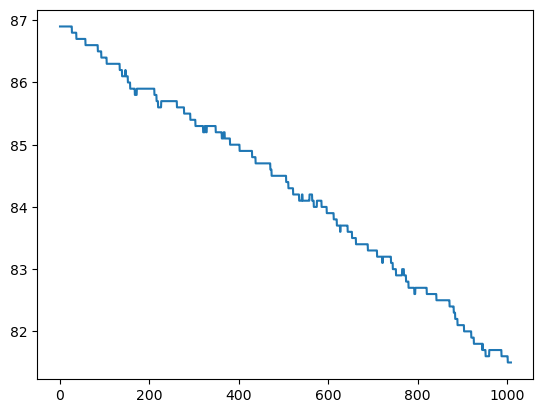

In [26]:
# tripA01.loc[:,'SoC [%]']
plt.plot(tripA01.loc[:,'Time [s]'], tripA01.loc[:,'SoC [%]'])